In [226]:
import pandas as pd
import numpy as np

import datetime as dt

import seaborn as sns
import matplotlib.pyplot as plt

from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)


import cufflinks as cf
cf.go_offline()

import plotly.offline as pyo
import plotly.graph_objs as go

import missingno as msno

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

from ydata_profiling import ProfileReport

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

from sklearn.preprocessing import PolynomialFeatures



# Supervised Learning - problem regresji

## Eksploracyjna Analiza Danych (EDA - Exploratory Data Analysis)

wczytanie danych, przekształcenie dat

In [227]:
bike_data_raw = pd.read_csv('daily-bike-share.csv')
bike_data_raw['dteday'] = pd.to_datetime(bike_data_raw['dteday'])
bike_data_raw.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82


informacje o danych

In [228]:
bike_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  rentals     731 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(9)
memory usage: 80.1 KB


In [229]:
bike_data_raw.rentals.describe()

count     731.000000
mean      848.176471
std       686.622488
min         2.000000
25%       315.500000
50%       713.000000
75%      1096.000000
max      3410.000000
Name: rentals, dtype: float64

<Figure size 500x500 with 0 Axes>

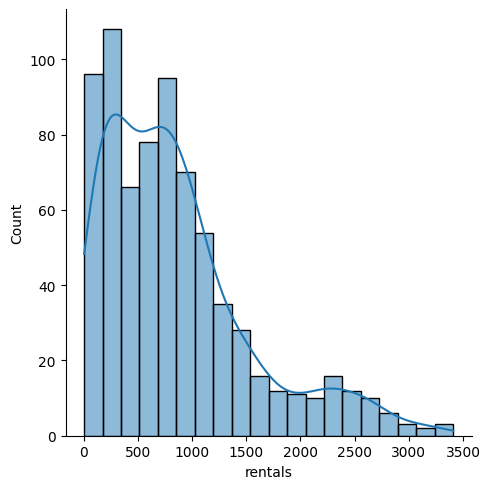

In [230]:
plt.figure(figsize=(5,5))
sns.displot(bike_data_raw['rentals'], kde=True)
plt.show()

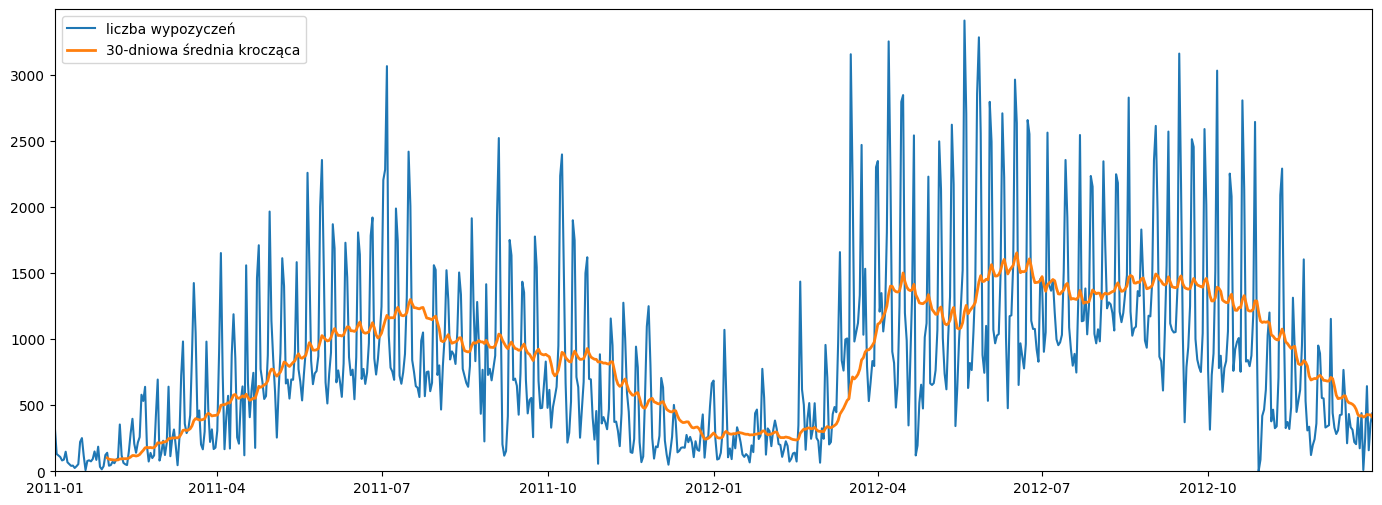

In [231]:
plt.figure(figsize=(17,6))
plt.plot(bike_data_raw['dteday'], bike_data_raw['rentals'], label='liczba wypozyczeń')
plt.plot(bike_data_raw['dteday'], bike_data_raw['rentals'].rolling(30).mean(), label='30-dniowa średnia krocząca', linewidth=2)
plt.legend(loc='upper left')
plt.xlim([bike_data_raw['dteday'].min(),bike_data_raw['dteday'].max()])
plt.ylim([0,bike_data_raw['rentals'].max()*1.025])
plt.show()

In [232]:
print('Przed usunięciem:')
display(bike_data_raw.head(5))
print('Po usunięciu:')
bike_data = bike_data_raw.copy()
bike_data.drop(['instant', 'dteday','yr'], axis=1, inplace=True)
display(bike_data.head(5))

Przed usunięciem:


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82


Po usunięciu:


,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82


In [233]:
numeric_features = bike_data.columns[6:-1].to_list()
categorical_features = bike_data.columns[:6].to_list()
target = 'rentals'

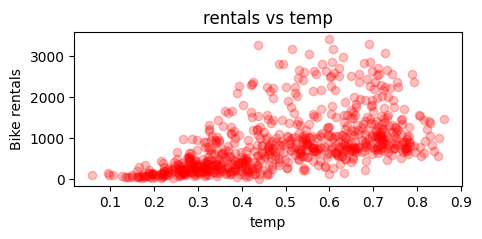

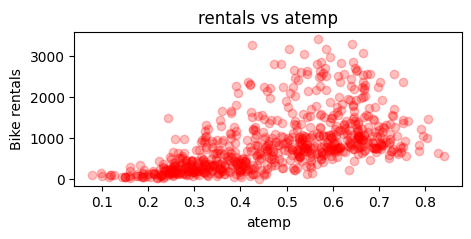

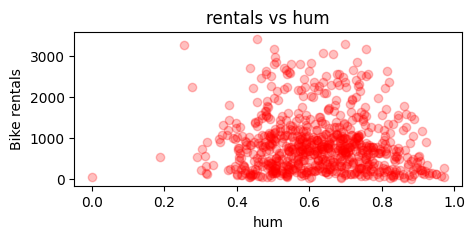

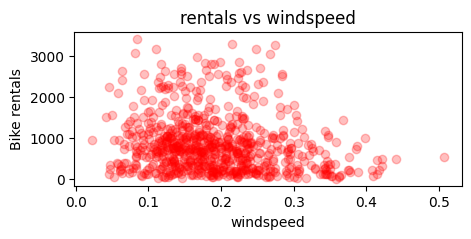

In [234]:
for numeric_feature in numeric_features:
    fig = plt.figure(figsize=(5,2))
    plt.scatter(bike_data[numeric_feature], bike_data[target], alpha=0.25, marker = 'o', c='r')
    plt.xlabel(numeric_feature)
    plt.ylabel('Bike rentals')
    plt.title(f'rentals vs {numeric_feature}')
    plt.show()

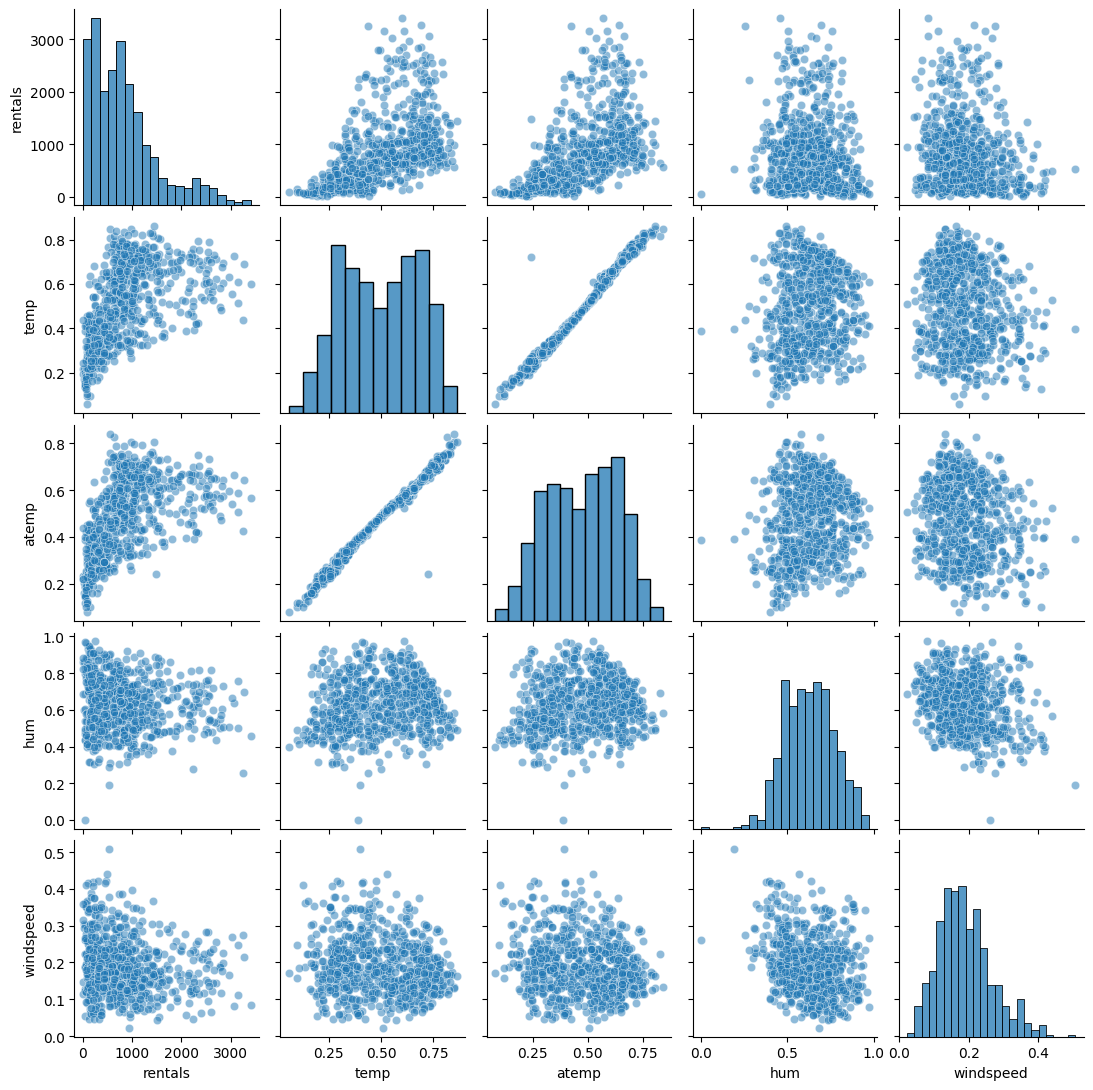

In [235]:
# fig = sns.pairplot(bike_data[[target]+numeric_features])
fig = sns.pairplot(bike_data[[target]+numeric_features], kind='scatter', plot_kws={'alpha': 0.5})
fig.fig.set_size_inches(11,11)
plt.show()

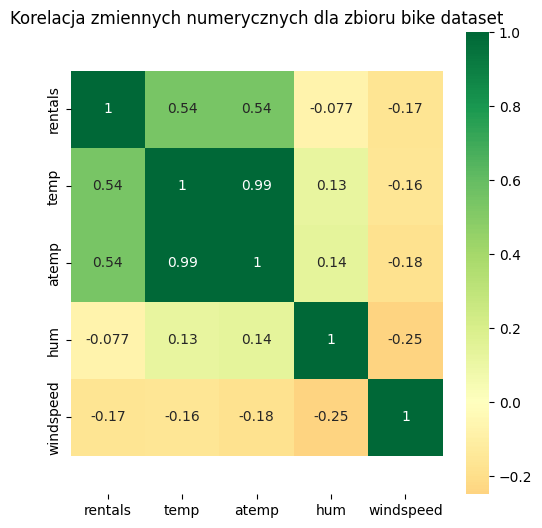

In [236]:
plt.figure(figsize=(6,6))
ax = sns.heatmap(
        bike_data[[target]+numeric_features].corr(),
        xticklabels=bike_data[[target]+numeric_features].corr().columns,
        yticklabels=bike_data[[target]+numeric_features].corr().columns,
        cmap='RdYlGn',
        center=0,
        annot=True
                )
plt.title('Korelacja zmiennych numerycznych dla zbioru bike dataset', fontsize=12)
bottom, top = ax.get_ylim()
ax.set_ylim([bottom+0.5, top-0.5])
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [237]:
bike_data['difference_temp'] = (bike_data['atemp']-bike_data['temp'])/bike_data['temp']
bike_data.drop(['atemp'], axis=1, inplace=True)
numeric_features.remove('atemp')
numeric_features.append('difference_temp')

In [238]:
bike_data[['rentals', 'temp', 'difference_temp']].corr()

,rentals,temp,difference_temp
rentals,1.000000,0.543285,-0.310423
temp,0.543285,1.000000,-0.599254
difference_temp,-0.310423,-0.599254,1.000000


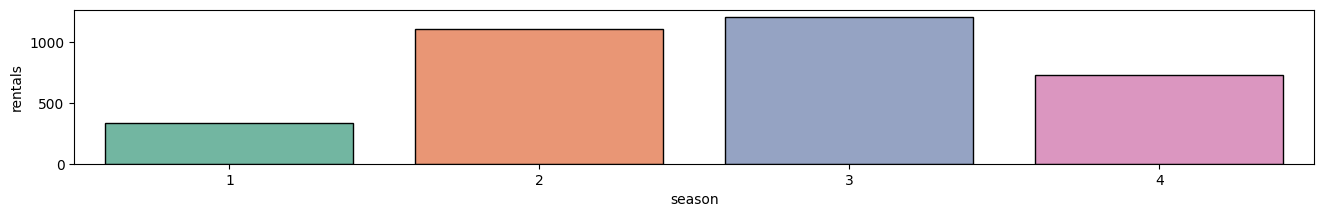

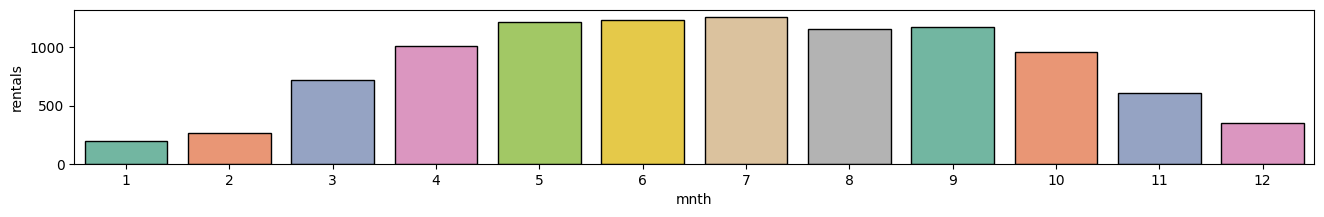

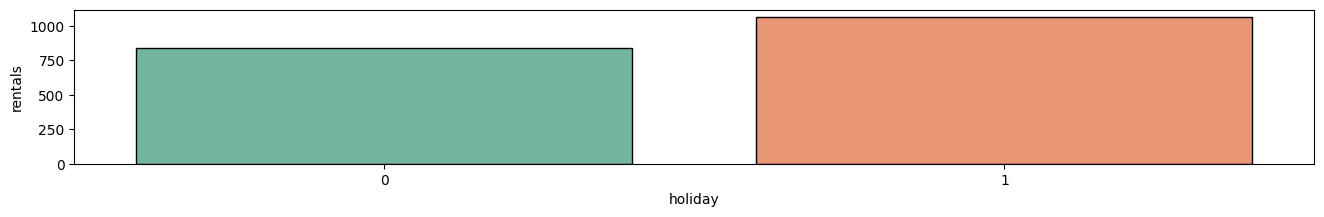

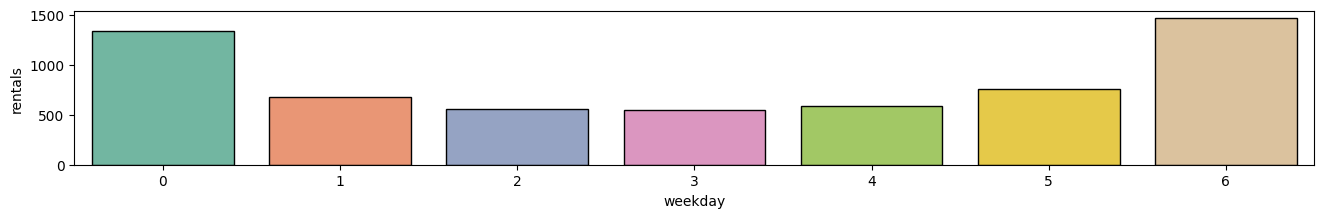

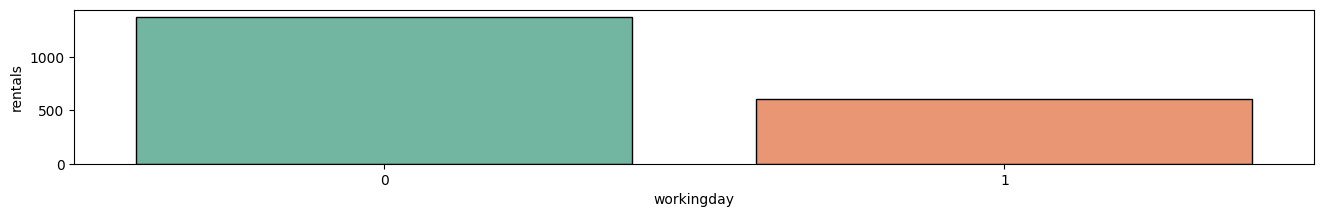

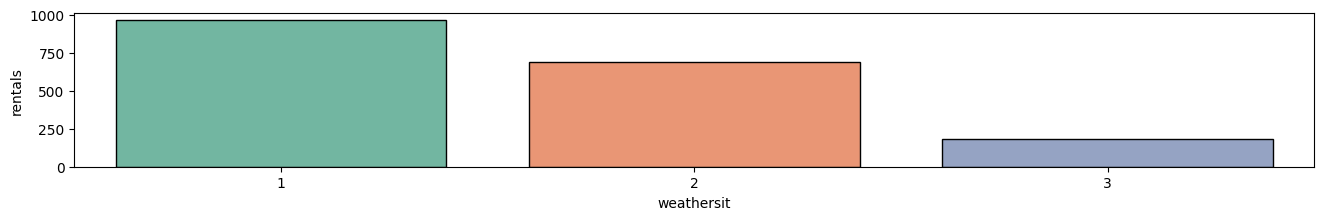

In [239]:
for categorical_feature in categorical_features:
    data = bike_data[[target] + categorical_features].copy().groupby(categorical_feature).mean().reset_index()
    plt.figure(figsize=(16,2))
    sns.barplot(x=data[categorical_feature],y=data[target], palette="Set2", edgecolor='k')
    plt.show()

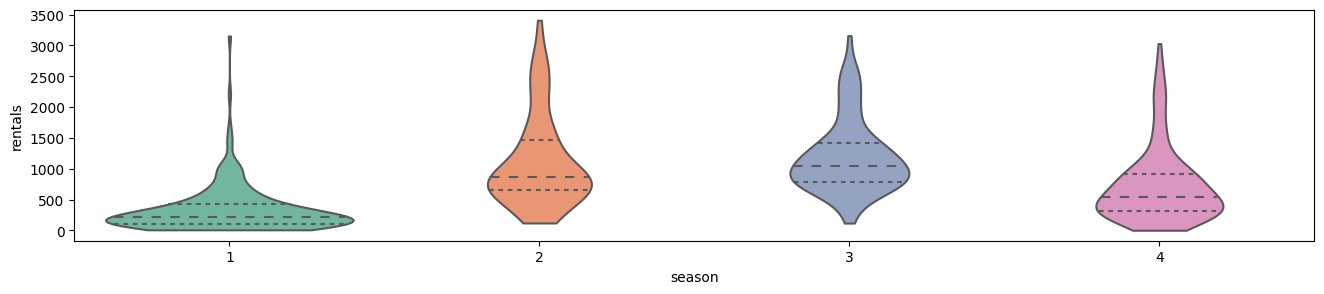

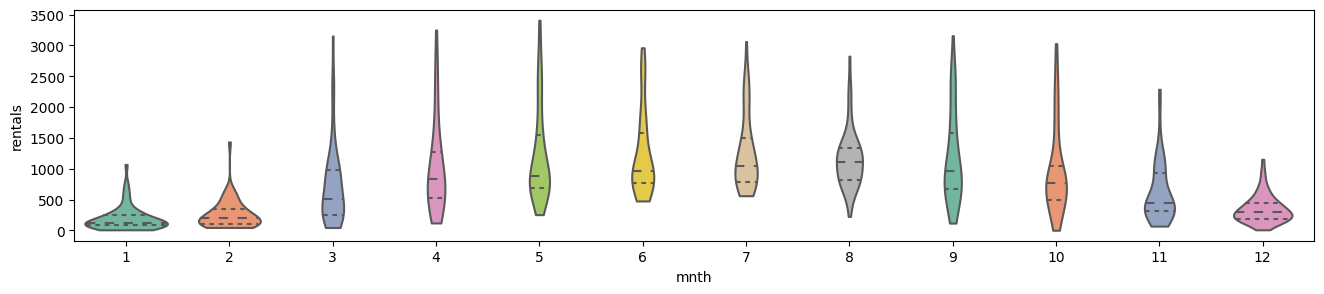

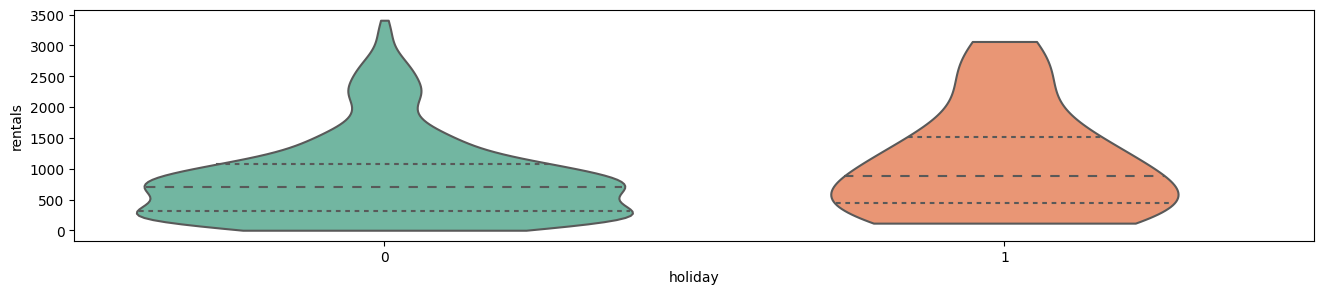

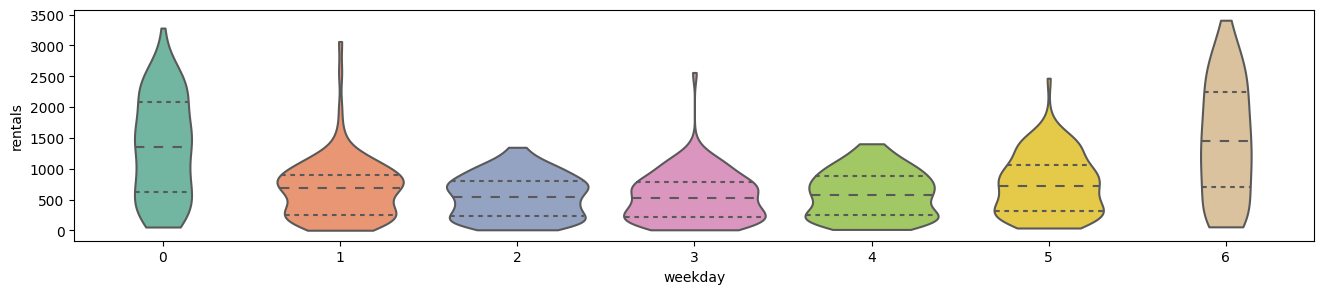

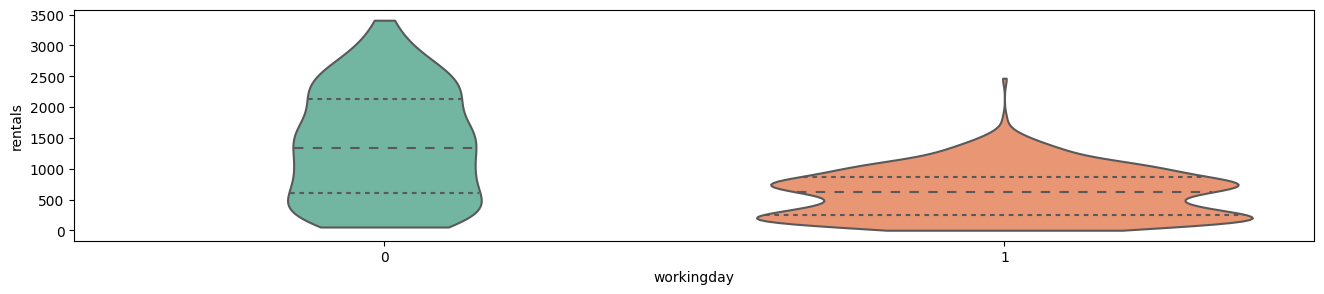

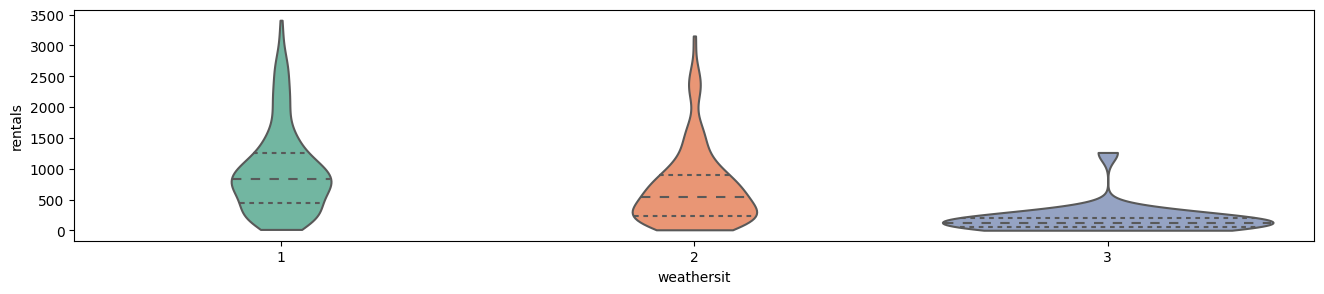

In [240]:
for categorical_feature in categorical_features:
    plt.figure(figsize=(16,3))
    sns.violinplot(y=bike_data[target], x=bike_data[categorical_feature], palette='Set2',
                   inner='quart', cut=0, split=True)
    plt.show()

#### Zadanie: wnioski

Spróbuj samodzielnie wyciągnąć wnioski z powyższych wykresów i podzielić się nimi z Mentorem. Wskaż np. w które miesiące wypożycza się więcej rowerów i zastanów się, dlaczego tak jest.

Wnioski zapisz w dokumencie tekstowym, np. w Google Docs i prześlij link swojemu Mentorowi.

## Część 2

### Regresja liniowa jednej zmiennej

In [241]:
print(f'Numeric features: {numeric_features}')
print(f'Categorical features: {categorical_features}')
print(f'Target: {target}')
display(bike_data)

Numeric features: ['temp', 'hum', 'windspeed', 'difference_temp']
Categorical features: ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
Target: rentals


,season,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,rentals,difference_temp
0,1,1,0,6,0,2,0.344167,0.805833,0.160446,331,0.056537
1,1,1,0,0,0,2,0.363478,0.696087,0.248539,131,-0.026794
2,1,1,0,1,1,1,0.196364,0.437273,0.248309,120,-0.035439
3,1,1,0,2,1,1,0.200000,0.590435,0.160296,108,0.060610
4,1,1,0,3,1,1,0.226957,0.436957,0.186900,82,0.010191
...,...,...,...,...,...,...,...,...,...,...,...
726,1,12,0,4,1,2,0.254167,0.652917,0.350133,247,-0.108295
727,1,12,0,5,1,2,0.253333,0.590000,0.155471,644,0.006762
728,1,12,0,6,0,2,0.253333,0.752917,0.124383,159,-0.043157
729,1,12,0,0,0,1,0.255833,0.483333,0.350754,364,-0.094331


In [242]:
X = bike_data[['temp']].copy()
y = bike_data[target].copy()
print('X: ')
display(X.values[:3])
print('\n y:')
display(y.values[:3])

X: 


array([[0.344167],
       [0.363478],
       [0.196364]])


 y:


array([331, 131, 120], dtype=int64)

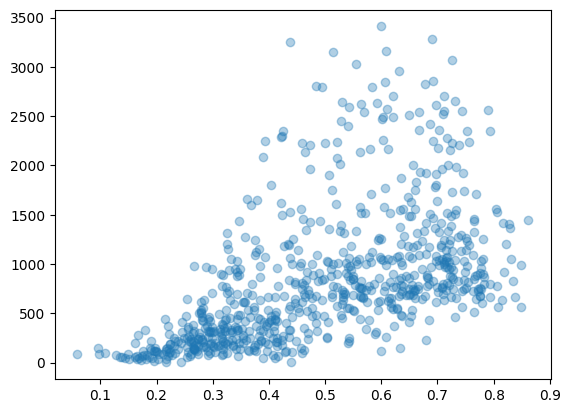

In [243]:
plt.scatter(X,y, alpha=0.35)
plt.show()

### Zbiór treningowy i testowy

In [244]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
print(f'{X.shape =}, {y.shape =}\n')
print(f'{X_train.shape = }, {y_train.shape = }\n')
print(f'{X_test.shape = }, {y_test.shape = }\n')

X.shape =(731, 1), y.shape =(731,)

X_train.shape = (584, 1), y_train.shape = (584,)

X_test.shape = (147, 1), y_test.shape = (147,)



tworzenie modelu i dopasowanie go do danych treningowych

In [245]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

współczynnik kierunkowy $\beta_1$ i wyraz wolny $\beta_0$ prostej linii regresji $y=\beta_0+\beta_1 X$

In [246]:
print(f'{lr_model.coef_ = }, {lr_model.intercept_ = }')

lr_model.coef_ = array([1990.31869846]), lr_model.intercept_ = -179.96286312537404


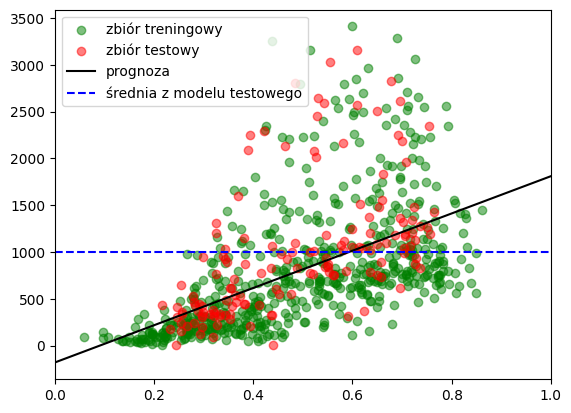

In [247]:
X_linspace = np.linspace(0,1,100)
y_fitted = lr_model.intercept_ + X_linspace*lr_model.coef_ # prosta regresji

plt.scatter(X_train, y_train, color='green', alpha=0.5, label='zbiór treningowy')
plt.scatter(X_test, y_test, color='red', alpha=0.5, label='zbiór testowy')
plt.plot(X_linspace, y_fitted, color='black', label='prognoza')
plt.axhline(y=y_test.mean(), color='blue', linestyle='--', label='średnia z modelu testowego')
plt.xlim([0,1])
plt.legend(loc='best')

plt.show()

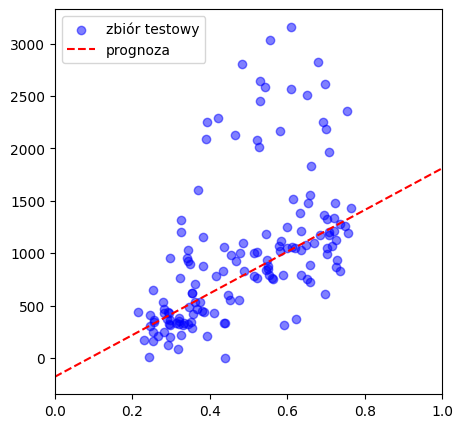

In [248]:
X_linspace = np.linspace(0,1,100)
y_fitted = lr_model.intercept_ + X_linspace*lr_model.coef_ # prosta regresji

plt.figure(figsize=(5,5))
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label='zbiór testowy')
plt.plot(X_linspace, y_fitted, color='r', label='prognoza', linestyle='--')
plt.xlim([0,1])
plt.legend(loc='best')
plt.show()

predykcja dla dowolnych nowych danych temperatury

In [249]:
X_new = [[0.3],[0.7]]
predicted_data = lr_model.predict(X_new).round().astype(int)
predicted_data

array([ 417, 1213])

### Ocena modelu

przewidywania modelu liniowej regresji na zbiorze treningowym i testowym

In [250]:
y_predict_train = lr_model.predict(X_train)
y_predict_test = lr_model.predict(X_test)

In [251]:
print('Predykcja:')
print(np.round(y_predict_test[:5]).astype(int))
print('Wartość prawdziwa:')
print(y_test.values[:5])

Predykcja:
[1285 1313 1324 1245 1198]
Wartość prawdziwa:
[1278 1263 1196 1065 2247]


#### Współczynnik determinacji (właściwie współczynnik zbiezności)

'$$R^2 = 1- \dfrac{\displaystyle{\sum_{i=1}^n \left(y_i-\hat{y}_i\right)^2}}{\displaystyle{\sum_{i=1}^n \left(y_i-\overline{y}\right)^2}}$$'

gdzie $y_i$ to wartości prawdziwe, $\hat{y}_i$ to wartości prognozy, a $\overline{y}$ - średnia z obserwacji.

Nb. według Wikipedii to jest współczynnik zbieżności $\varphi^2=1-R^2$

_"Współczynnik zbieżności $\varphi ^{2}$ określa, jaka część zaobserwowanej w próbie zmienności zmiennej objaśnianej nie pasuje do modelu (mieści się w jego błędzie). Współczynnik zbieżności przyjmuje wartości z przedziału [0;1]; wartości te najczęściej są wyrażane w procentach. Dopasowanie modelu jest tym lepsze, im wartość $\varphi ^{2}$ jest bliższa zeru."_

obliczenia 'ręczne'

In [252]:
y_i = y_train
y_hat_i = y_predict_train
y_ = np.mean(y_hat_i)
r_squared = 1-np.array((y_i-y_hat_i)**2).sum()/np.array((y_i-y_)**2).sum()
r_squared, np.sqrt(r_squared)

(0.30617863454631344, 0.5533341075212276)

ocena wsp. determinacji $R^2$ (miara jakości dopasowanie modelu do danych uczących) na zbiorze treningowym

In [253]:
print(f'Train R^2: {r2_score(y_train, y_predict_train)}')

Train R^2: 0.30617863454631344


#### MAE - Mean Absolute Error

'$$MAE = \dfrac{1}{n} \displaystyle{\sum_{i=1}^n \left|y_i-\hat{y}_i\right|}$$'

"_Średnie odchylenie bezwzględne (inaczej: odchylenie przeciętne) to średnia arytmetyczna z odchyleń bezwzględnych dla wszystkich elementów zbioru danych statystycznych_"


ocena predykcji na zbiorze treningowym i testowym

In [254]:
print(f'Train MAE: {mean_absolute_error(y_train, y_predict_train)}')
print(f'Test MAE: {mean_absolute_error(y_test, y_predict_test)}')

Train MAE: 404.8339599752615
Test MAE: 391.02879410802956


tabelka - statystyki

In [255]:
comparison = pd.concat([y_train.describe(),y_test.describe(),pd.Series(y_predict_train).describe(), pd.Series(y_predict_test).describe()], axis=1)
comparison.columns=['y_train','y_test','y_predict_train','y_predict_test']
comparison

,y_train,y_test,y_predict_train,y_predict_test
count,584.000000,147.000000,584.000000,147.000000
mean,809.794521,1000.659864,809.794521,790.978600
std,677.311294,704.335746,374.779440,320.187204
min,9.000000,2.000000,-62.274522,249.613593
25%,256.500000,436.000000,488.037352,502.550259
50%,677.000000,875.000000,820.172283,783.683770
75%,1051.250000,1207.500000,1134.061962,1084.718478
max,3410.000000,3160.000000,1535.029079,1340.973006


Zatem średnio nasz model myli się o liczbę 404 rowerów. Dużo? Odpowiedź uzasadnij i podziel się nią z Mentorem!

#### odpowiedź: 

Wydaje mi się, że niedużo, jest to niewiele ponad połowę odchylenia standardowego zarówno danych treningowych jak i testowych.

Widać, że **y_predict_train** zachowuje średnią z danych treningowych.

#### MAPE - Mean Absolute Percentage Error

'$$MAPE = \dfrac{1}{n} \displaystyle{\sum_{i=1}^n \dfrac{\left|y_i-\hat{y}_i\right|}{y_i}}$$'


In [256]:
print(f'Train MAPE: {mean_absolute_percentage_error(y_train, y_predict_train)}')
print(f'Test MAPE: {mean_absolute_percentage_error(y_test, y_predict_test)}')

Train MAPE: 0.9668581511778538
Test MAPE: 2.9864925318560496


błąd wynosi średnoi 300%?

#### MSE - Mean Squared Eror


'$$MSE = \dfrac{1}{n} \displaystyle{\sum_{i=1}^n \left(y_i-\hat{y}_i\right)^2}$$'

In [257]:
print(f'Train MSE: {mean_squared_error(y_train, y_predict_train)}')
print(f'Test MSE: {mean_squared_error(y_test, y_predict_test)}')

Train MSE: 317745.94124252343
Test MSE: 397066.9447179113


#### RMSE - Root Mean Squared Error

$$RMSE = \sqrt{MSE}$$


In [258]:
print(f'Train RMSE: {mean_squared_error(y_train, y_predict_train)**0.5}')
print(f'Test RMSE: {mean_squared_error(y_test, y_predict_test)**0.5}')

Train RMSE: 563.6895787953894
Test RMSE: 630.1324818781454


In [259]:
model_first = pd.Series(dict({'Test MSE': mean_squared_error(y_test, y_predict_test), 
 'Test RMSE': np.sqrt(mean_squared_error(y_test, y_predict_test)),
 'Test MAE': mean_absolute_error(y_test, y_predict_test),'Test MAPE': mean_absolute_percentage_error(y_test, y_predict_test)}))

### Wizualizacyjna ocena modelu


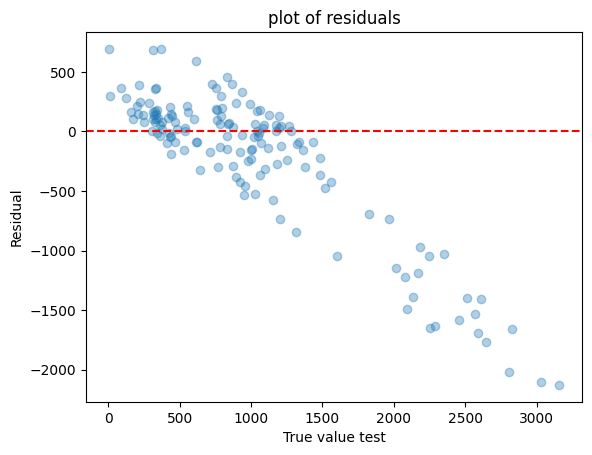

In [260]:
errors = y_predict_test-y_test
plt.scatter(x=y_test, y=errors, alpha=0.35)
plt.axhline(y=0, linestyle='--', color='r')
plt.xlabel('True value test')
plt.ylabel('Residual')
plt.title('plot of residuals')
plt.show()

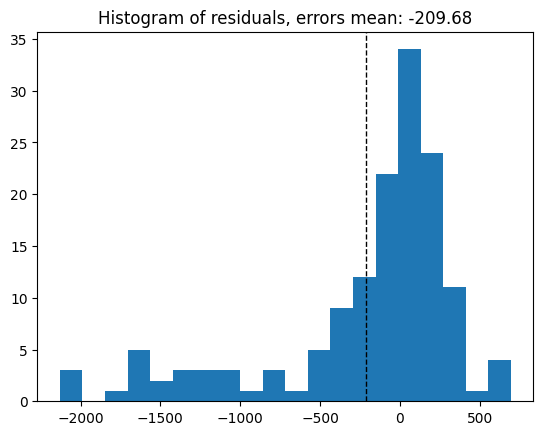

In [261]:
plt.hist(errors, bins=20)
plt.axvline(x=errors.mean(), color='black', linewidth=1, linestyle='--')
plt.title(f'Histogram of residuals, errors mean: {np.round(errors.mean(),2)}')
plt.show()

### Regresja wielomianowa

In [262]:
r_2_train_list, rmse_train_list, rmse_test_list = [], [], []

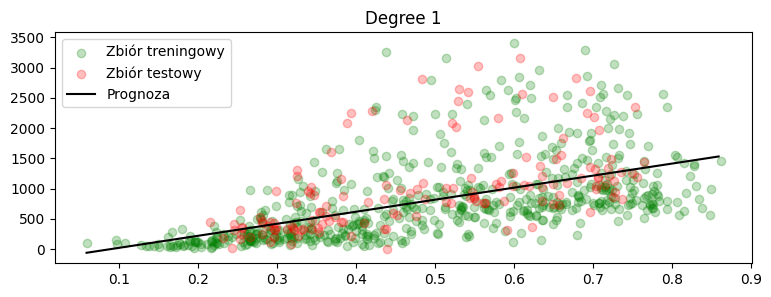

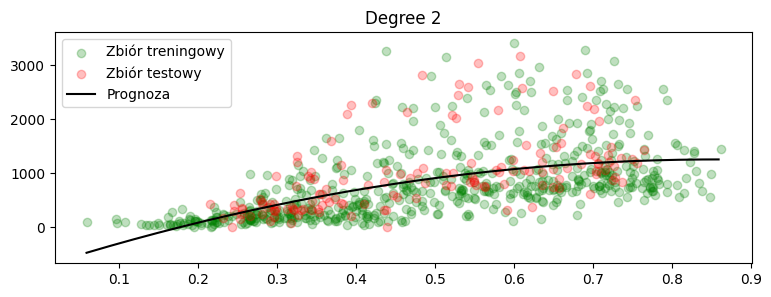

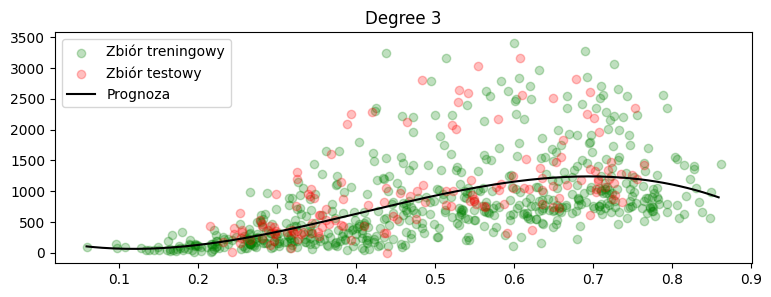

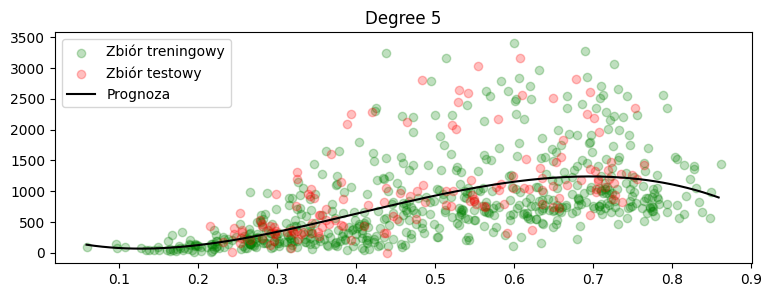

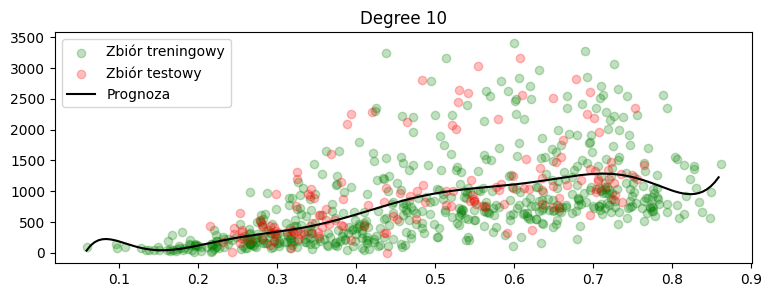

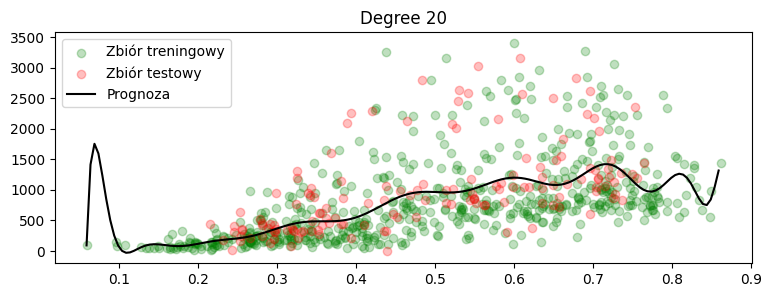

In [263]:
X_linespace = np.arange(X.min()[0], X.max()[0], step=0.005).reshape(-1,1)
for degree in [1, 2, 3, 5, 10, 20]:

    # transformacja X
    # funkcja generująca 'wielomian' z potęg i iloczynów tablicy
    poly_transformer = PolynomialFeatures(degree=degree)
    X_train_transformed = poly_transformer.fit_transform(X_train)
    # uwaga: dla danych treningowych używamy fit_transform(), dla testowych transform()

    # trenowanie modelu
    # wczytanie modelu liniowej regresji
    polynomial_regression = LinearRegression()
    # trenowanie modelu 
    polynomial_regression.fit(X_train_transformed, y_train)
    
    # wizualizacja danych ze zioru treningowego oraz testowego 
    plt.figure(figsize=(9, 3))
    plt.scatter(X_train, y_train, c='g', alpha=0.25, label='Zbiór treningowy')
    plt.scatter(X_test, y_test, c='r', alpha=0.25, label='Zbiór testowy')
    
    # tworzymi liniową regresję nie względem X, tylko względem wielomianu X, 
    # czyli trenujemy liniową regresję dopasowując ją do 1, X[i], X[i]^2, X[j]^2, X[i]*X[j] itd
    
    y_fitted = polynomial_regression.predict(poly_transformer.transform(X_linespace))

    # wizualizacja wielomianu
    plt.plot(X_linespace, y_fitted, c='k', label='Prognoza')
    plt.title(f'Degree {degree}')
    plt.legend(loc = 'upper left')
    plt.show()

    # Predykcja modelu na zbiorze treningowym
    prediction_train = polynomial_regression.predict(X_train_transformed)

    # Predykcja modelu na zbiorze testowym - ale po przekształceniu zbioru testowego
    X_test_transformed = poly_transformer.transform(X_test)
    prediction_test = polynomial_regression.predict(X_test_transformed)

    # Ocena modeli
    r_2_train_list.append(r2_score(y_train, prediction_train))
    rmse_train_list.append(np.sqrt(mean_squared_error(y_train, prediction_train)))
    rmse_test_list.append(np.sqrt(mean_squared_error(y_test, prediction_test)))

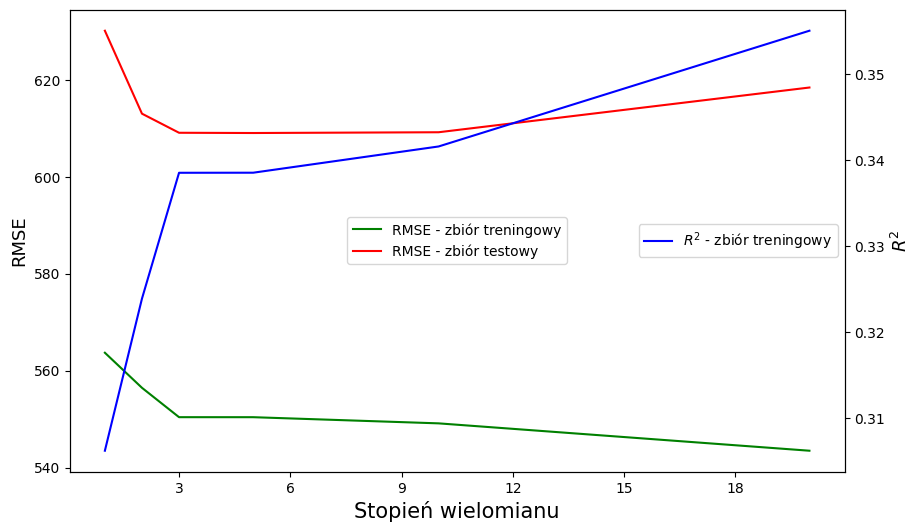

In [264]:
from matplotlib.ticker import MaxNLocator

fig = plt.figure(figsize=(10,6))
ax=fig.add_subplot()
ax.plot([1,2,3,5,10,20], rmse_train_list, color='green', label='RMSE - zbiór treningowy')
ax.plot([1,2,3,5,10,20], rmse_test_list, color='red', label='RMSE - zbiór testowy')
ax.legend(loc='center')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_ylabel('RMSE', size=13)
ax.set_xlabel('Stopień wielomianu', size=15)

ax2 = ax.twinx()
ax2.plot([1,2,3,5,10,20], r_2_train_list, color='blue', label='$R^2$ - zbiór treningowy')
ax2.legend(loc='center right')
ax2.set_ylabel('$R^2$', size=13)

plt.show()

### Zbiór walidacyjny - sprawdzian krzyżowy

### Wybór hiperparametrów

In [265]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=5, shuffle=False)
# Z grubsza, KFold dzieli zbiór na dane treningowe i testowe, zwracając indeksy [i for i in trainning_indices], [k for k in test_indices]

#### Pipeline

In [266]:
from sklearn.pipeline import make_pipeline # pipeline czymkolwiek jest
from sklearn.model_selection import GridSearchCV # siatka hiperparametrów

Nasz model musi najpierw przekształcić dane (stopień wielomianu), a następnie na nich wytrenować model, stąd też kolejność działań jest istotna - stworzymy nasz pierwszy Pipeline, który uwzględnia różne operacje.

In [267]:
# Tworzymy Pipeline - najpierw tworzymy wielomian, następnie uczymy model
polynomial_regression_pipeline = make_pipeline(PolynomialFeatures(),
                                               LinearRegression())
# funkcja make_pipeline przyjmuje jako argumenty estymatory

# Nasz model sprawdzi te hiperparametry
params = {'polynomialfeatures__degree': [1, 2, 3, 4, 5]}

# Inicjalizujemy Pipeline
polynomial_regression_gridsearch = GridSearchCV(estimator=polynomial_regression_pipeline,
                                                param_grid=params,
                                                scoring='neg_mean_squared_error', 
                                                # wybrane będą takie hiperparametry, które dadzą najmniejszą wartość dla tego scoringu
                                                # inaczej: są to zasady ewaluacji modelu
                                                cv=cv)  # cross-calidation generator(zdefiniowany powyżej)

# Uczymy Grid Search, podajemy X_train - Pipeline za nas zrobi wielomian :)
polynomial_regression_gridsearch.fit(X_train, y_train)
print("\nNajlepsze hiperparametry:", polynomial_regression_gridsearch.best_params_, "\n")

y_pred_tr = polynomial_regression_gridsearch.predict(X_train)
print(f'Train R^2: {r2_score(y_train, y_pred_tr)}')
print(f'Train MSE: {mean_squared_error(y_train, y_pred_tr)}')
print(f'Train RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_tr))}')
print(f'Train MAE: {mean_absolute_error(y_train, y_pred_tr)}')
print(f'Train MAPE: {mean_absolute_percentage_error(y_train, y_pred_tr) }')



# Przekazujemy najlepszy estymator
polynomial_regression_model = polynomial_regression_gridsearch.best_estimator_
predictions = polynomial_regression_model.predict(X_test)
print(f'Test MSE: {mean_squared_error(y_test, predictions)}')
print(f'Test RMSE: {np.sqrt(mean_squared_error(y_test, predictions))}')
print(f'Test MAE: {mean_absolute_error(y_test, predictions)}')
print(f'Test MAPE: {mean_absolute_percentage_error(y_test, predictions)}')



Najlepsze hiperparametry: {'polynomialfeatures__degree': 3} 

Train R^2: 0.3385254247551215
Train MSE: 302932.2416177629
Train RMSE: 550.3928066551769
Train MAE: 394.99380246760757
Train MAPE: 0.8491537777005765
Test MSE: 370974.52423950454
Test RMSE: 609.076780249834
Test MAE: 389.0600774194398
Test MAPE: 3.1036205434802304


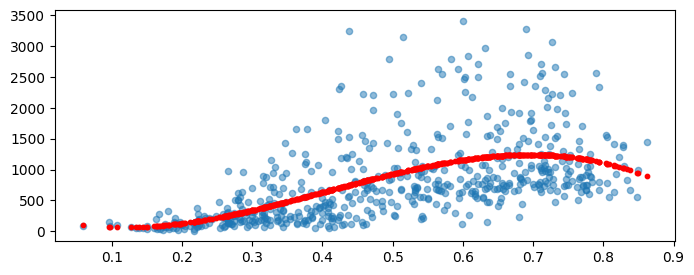

In [268]:
plt.figure(figsize=(8,3))
plt.scatter(X_train, y_train, marker='o', s=20, alpha=0.5)
plt.scatter(X_train, polynomial_regression_gridsearch.predict(X_train), c='r', s=10)
plt.show()

### Regresja wielu zmiennych

In [269]:
numeric_features, target

(['temp', 'hum', 'windspeed', 'difference_temp'], 'rentals')

In [270]:
bike_data

,season,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,rentals,difference_temp
0,1,1,0,6,0,2,0.344167,0.805833,0.160446,331,0.056537
1,1,1,0,0,0,2,0.363478,0.696087,0.248539,131,-0.026794
2,1,1,0,1,1,1,0.196364,0.437273,0.248309,120,-0.035439
3,1,1,0,2,1,1,0.200000,0.590435,0.160296,108,0.060610
4,1,1,0,3,1,1,0.226957,0.436957,0.186900,82,0.010191
...,...,...,...,...,...,...,...,...,...,...,...
726,1,12,0,4,1,2,0.254167,0.652917,0.350133,247,-0.108295
727,1,12,0,5,1,2,0.253333,0.590000,0.155471,644,0.006762
728,1,12,0,6,0,2,0.253333,0.752917,0.124383,159,-0.043157
729,1,12,0,0,0,1,0.255833,0.483333,0.350754,364,-0.094331


In [271]:
# Podział na zmienne objaśniające i zmienną objaśnianą
X = bike_data[numeric_features].copy()
y = bike_data[target].copy()

# Podział na zbiór treningowy i testowy (taki sam podział co poprzednio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Uczymy model
polynomial_regression_pipeline = make_pipeline(PolynomialFeatures(),
                                               LinearRegression())
params = {'polynomialfeatures__degree': [1, 2, 3, 4, 5]}
polynomial_regression_gridsearch = GridSearchCV(polynomial_regression_pipeline,
                                                params,
                                                scoring='neg_mean_squared_error', # wybrane będą takie hiperparametry które dadzą najmniejszą wartość dla tego scoringu
                                                cv=cv)

polynomial_regression_gridsearch.fit(X_train, y_train)
print("\nNajlepsze hiperparametry:", polynomial_regression_gridsearch.best_params_, "\n")

polynomial_regression_model = polynomial_regression_gridsearch.best_estimator_
predictions = polynomial_regression_model.predict(X_test)
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, predictions))}')


Najlepsze hiperparametry: {'polynomialfeatures__degree': 1} 

RMSE: 618.1519697010564


### Regularyzacja

In [272]:
# Importujemy regresję liniową z regularyzacją Lasso i Ridge
from sklearn.linear_model import ElasticNet

# Uczymy model
polynomial_regression_pipeline = make_pipeline(PolynomialFeatures(),
                                               ElasticNet())

params = {'polynomialfeatures__degree': [1, 2, 3, 4, 5],
          'elasticnet__alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0],
          'elasticnet__l1_ratio': np.arange(0, 1.1, 0.1)}

polynomial_regression_gridsearch = GridSearchCV(polynomial_regression_pipeline,
                                                params,
                                                scoring='neg_mean_squared_error', # wybrane będą takie hiperparametry które dadzą najmniejszą wartość dla tego scoringu
                                                cv=cv,
                                                n_jobs=-1)

polynomial_regression_gridsearch.fit(X_train, y_train)
print("\nNajlepsze hiperparametry:", polynomial_regression_gridsearch.best_params_, "\n")


polynomial_regression_model = polynomial_regression_gridsearch.best_estimator_
predictions = polynomial_regression_model.predict(X_test)
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, predictions))}')


Najlepsze hiperparametry: {'elasticnet__alpha': 1.0, 'elasticnet__l1_ratio': 1.0, 'polynomialfeatures__degree': 5} 

RMSE: 584.8854667922697


### Wykorzystanie zmiennych kategorycznych

In [273]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler

# Podział na zmienne objaśniające i zmienną objaśnianą
X = bike_data[numeric_features+categorical_features].copy()
y = bike_data[target].copy()

# Podział na zbiór treningowy i testowy (taki sam podział co poprzednio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
numeric_transformer = Pipeline(steps=[
    ('logtransformer', PowerTransformer()),
    ('standardscaler', StandardScaler()),
    ('polynomialfeatures', PolynomialFeatures())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Tworzenie końcowego Pipeline, który będziemy trenować
final_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('regressor', ElasticNet())])

params = {'preprocessor__num__polynomialfeatures__degree': [1, 2, 3, 4, 5],
          'regressor__alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0],
          'regressor__l1_ratio': np.arange(0, 1.1, 0.1)}

final_polynomial_regression_gridsearch = GridSearchCV(final_pipeline,
                                                      params,
                                                      scoring='neg_mean_squared_error',
                                                      cv=cv,
                                                      n_jobs=-1)

final_polynomial_regression_gridsearch.fit(X_train, y_train)
print("\nNajlepsze hiperparametry:", final_polynomial_regression_gridsearch.best_params_, "\n")

final_polynomial_regression_model = final_polynomial_regression_gridsearch.best_estimator_
predictions = final_polynomial_regression_model.predict(X_test)




Najlepsze hiperparametry: {'preprocessor__num__polynomialfeatures__degree': 1, 'regressor__alpha': 0.1, 'regressor__l1_ratio': 0.4} 

Test MSE: 234195.91507370374
Test RMSE: 483.93792481443705
Test MAE: 348.5851569015279
Test MAPE: 0.8593316395342374


## Zadanie - pozostałe metryki

$R^2$ (tylko dla zbioru treningowego?), $MAE$, $MAPE$, $MSE$, $RMSE$ (to już obliczono)

In [ ]:
model_final = pd.Series(dict({'Test MSE': mean_squared_error(y_test, predictions), 
 'Test RMSE': np.sqrt(mean_squared_error(y_test, predictions)),
 'Test MAE': mean_absolute_error(y_test, predictions),'Test MAPE': mean_absolute_percentage_error(y_test, predictions)}))

In [ ]:
print(f'Test MSE: {mean_squared_error(y_test, predictions)}')
print(f'Test RMSE: {np.sqrt(mean_squared_error(y_test, predictions))}')
print(f'Test MAE: {mean_absolute_error(y_test, predictions)}')
print(f'Test MAPE: {mean_absolute_percentage_error(y_test, predictions)}')

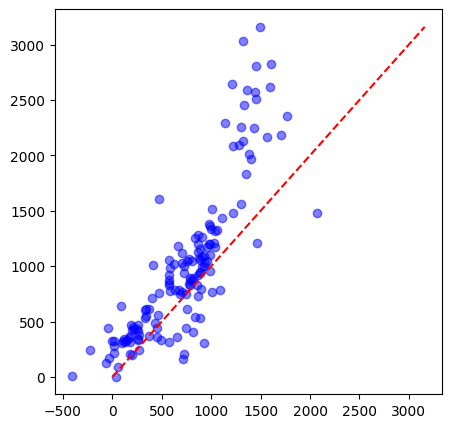

In [274]:
plt.figure(figsize=(5,5))
plt.scatter(predictions, y_test, alpha=0.5, c = 'blue', label='zbiór testowy')
plt.plot(y_test.sort_values(), y_test.sort_values(), c='r', linestyle='--', label='prognoza')
plt.show()

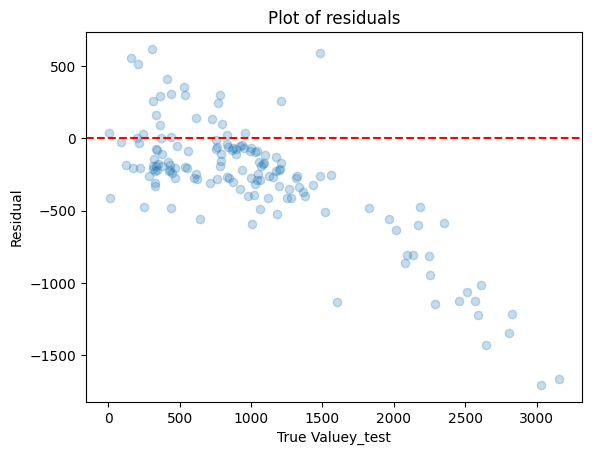

In [275]:
errors = predictions - y_test
plt.scatter(x = y_test, y = errors, alpha=0.25)
plt.axhline(0, color="r", linestyle="--")
plt.xlabel('True Valuey_test')
plt.ylabel('Residual')
plt.title(f'Plot of residuals')
plt.show()

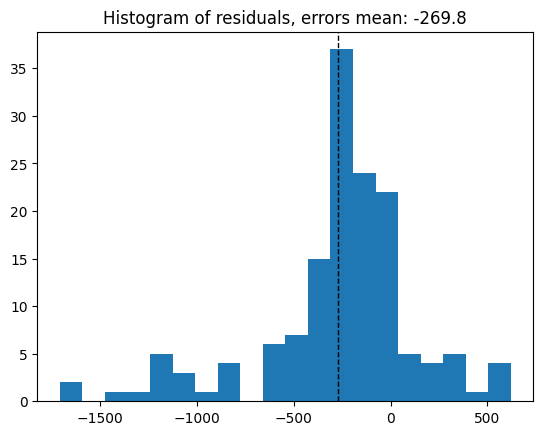

In [276]:
plt.hist(errors, bins=20)
plt.axvline(x=errors.mean(), color='black', linewidth=1, linestyle='--')
plt.title(f'Histogram of residuals, errors mean: {np.round(errors.mean(),2)}')
plt.show()

In [278]:
comparison = pd.concat([model_first, model_final], axis=1)
comparison.columns = ['simple_model','advanced_model']
comparison

,simple_model,advanced_model
Test MSE,397066.944718,234195.915074
Test RMSE,630.132482,483.937925
Test MAE,391.028794,348.585157
Test MAPE,2.986493,0.859332


residuals vs true values for simple (left) and advanced (right) model:

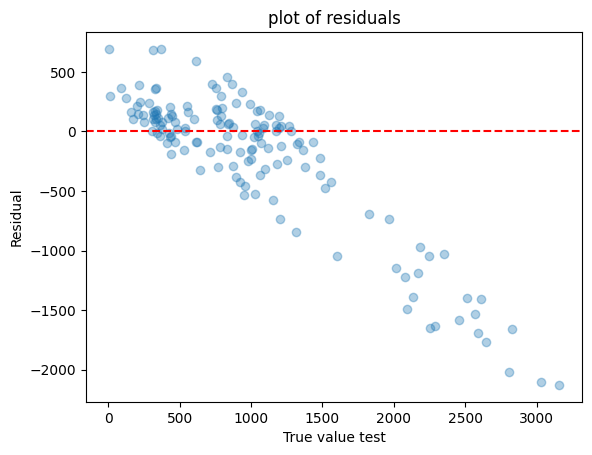 
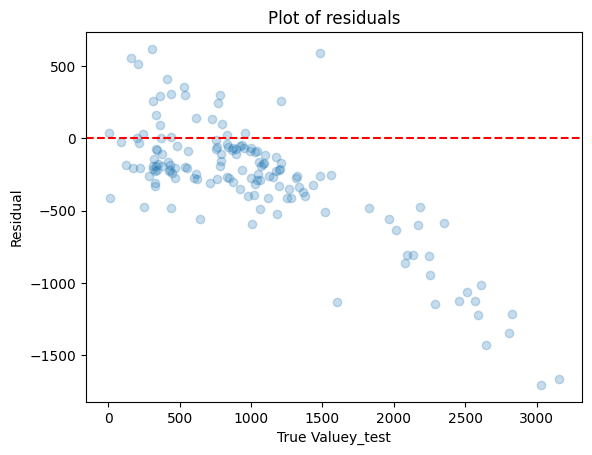

histogram of residuals for simple (left) and advanced (right) model:

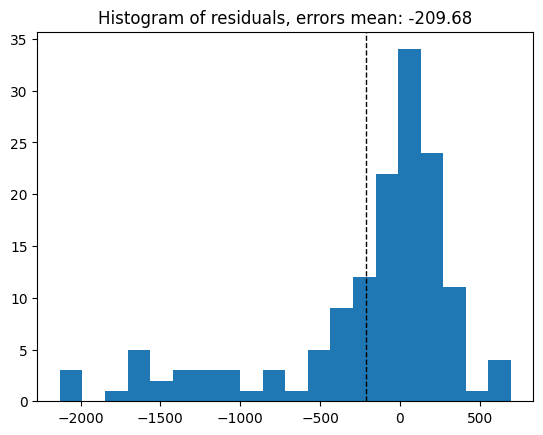
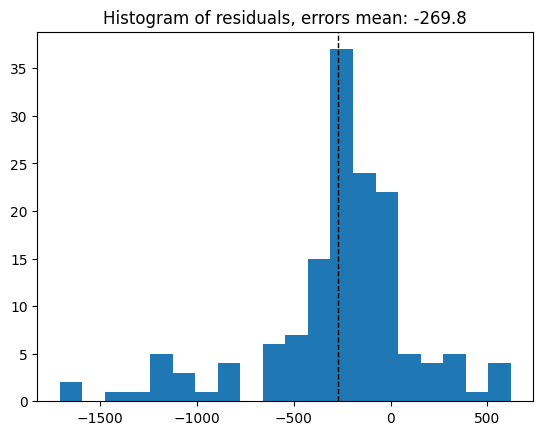


Między najprostszym i najbardziej zaawansowamym modelem widać znaczną różnicę w końcowych scoringach, najlepiej poprawę pokazuje MAPE